# Initial test to run ECmean4 functions within the AQUA framework

We load the AQUA routines, keeping in mind that we need to adjust some path

In [2]:
import sys 
sys.path.append('../../') 
from aqua import Reader

Open a small cluster to speed up the operations with dask (not required)

In [ ]:
# from dask.distributed import LocalCluster, Client, progress
# processes = False
# nworker = 2
# ncpu = 2
# threads = ncpu // nworker
# print(f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}, processes: {processes}")
# client = Client(processes=processes,
#  threads_per_worker=threads,
#  n_workers=nworker,
#  memory_limit='64GB'
#  )

Start loading the ecmean functions, define the years of the experiments and experiment name

In [3]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model = 'IFS'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'interface_IFS+NEMO-intake.yml'
config = 'config_intake.yml'

reader = Reader(model=model, exp=exp, source="lra-r100-mon", configdir = "../../config")
data = reader.retrieve(fix=False)
data


Source areas file not found: /work/bb1153/b382075/nextgems/weights/areas_IFS_tco2559-ng5_lra-r100-mon.nc
Attempting to generate it ...
Source grid:  /work/bm1235/a270046/cycle2-sync/tcogrids/4km/tcogrids/tco2559_grid.nc
Success!


<xarray.Dataset>
Dimensions:  (time: 37, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-25T23:30:00 2020-01-26 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables: (12/13)
    2t       (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    e        (time, lat, lon) float64 dask.array<chunksize=(4, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(3, 180, 360), meta=np.ndarray>
    sss      (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(5, 180, 360), meta=np.ndarray>
    tp       (time, lat, lon) float64 dask.array<chunksize=(4, 180, 360), meta=np.ndarray>
    tsr      (time, lat, lon) float64 dask.array<chunksize=(4, 180, 360), meta=np.ndarray>
    ttr      (time, lat, lon) float64 dask.array<chunksize=(4, 180, 360), meta=np.ndarray>

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [4]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

global_mean


Average net_toa ALL Global 2.84261688298912
Average tas ALL Global 9.972965855426992
Average pr ALL Global 3.009678722389721
Average psl ALL Global 1012.0813771790124
Average rsnt ALL Global 243.09287690318814
Average rlnt ALL Global -240.25026002019874


Done in 1.4497 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_tco2559-ng5_IFS+NEMO_r1i1p1f1_2020_2020.txt
Postproc done in 5.3396 seconds


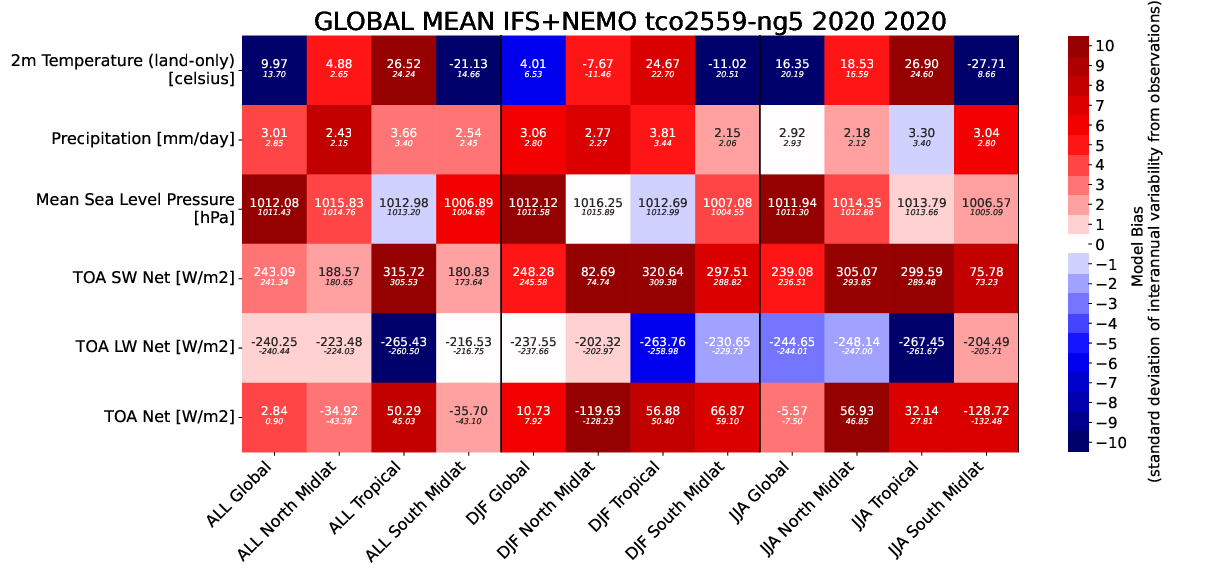

In [5]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/global_mean_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

In [6]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

performance_indices


Preproc in 6.9609 seconds
PI for Global ALL tas 28.506
PI for Global DJF tas 13.937
PI for Global JJA tas 27.218
PI for Global ALL pr 5.448
PI for Global DJF pr 3.451
PI for Global JJA pr 5.181
PI for Global ALL psl 3.152
PI for Global DJF psl 1.549
PI for Global JJA psl 2.83


Done in 1.3592 seconds with 1 processors
Postproc done in 0.7844 seconds


Open the obtained txt file

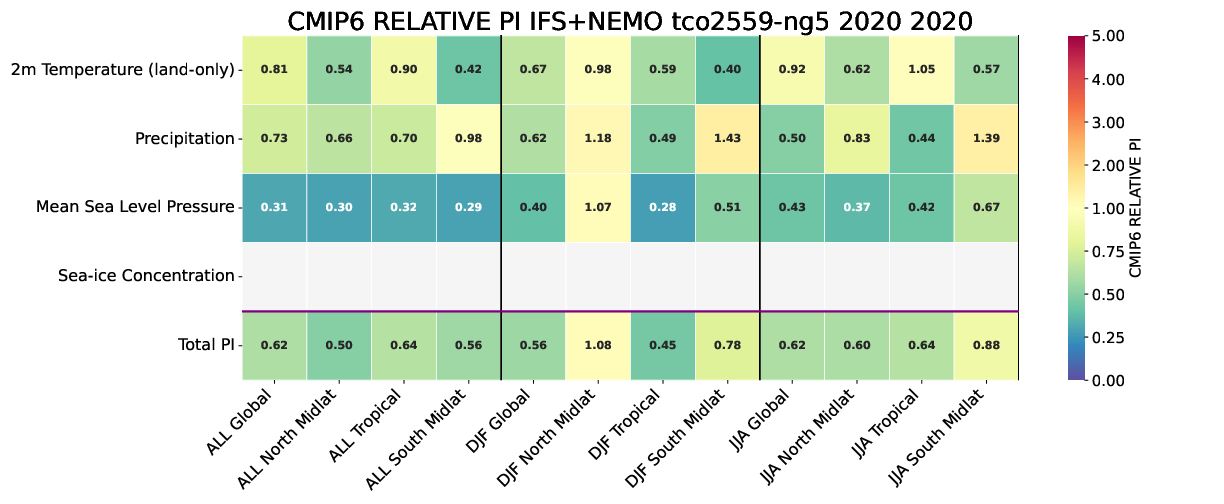

In [7]:
img = WImage(filename=f'/work/bb1153/b382076/ecmean/figures/PI4_EC23_{exp}_IFS+NEMO_r1i1p1f1_{year1}_{year2}.pdf')
img